### Import Libraries and Settings

In [87]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [88]:
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

pd.options.display.float_format = '{:.5f}'.format

In [89]:
import psutil
free = psutil.virtual_memory().free / (1024.0 ** 3)
used = psutil.virtual_memory().used / (1024.0 ** 3)
total = psutil.virtual_memory().total / (1024.0 ** 3)
print(total,used,free)
print(psutil.virtual_memory().percent,'%')

15.676994323730469 7.8243560791015625 7.852638244628906
49.9 %


In [90]:
import sys
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('DecisionTreeRegressor', 1704),
 ('Lasso', 1704),
 ('LinearRegression', 1704),
 ('RandomForestRegressor', 1704),
 ('Ridge', 1704),
 ('SVR', 1704),
 ('mean_squared_error', 160),
 ('open', 160),
 ('r2_score', 160),
 ('remove_outliers', 160),
 ('train_test_split', 160),
 ('go', 72),
 ('np', 72),
 ('pd', 72),
 ('plt', 72),
 ('px', 72),
 ('sm', 72),
 ('sns', 72),
 ('st', 72),
 ('ax', 48),
 ('fig', 48),
 ('p', 48),
 ('height', 32),
 ('width', 32),
 ('x', 32),
 ('y', 32),
 ('free', 24),
 ('total', 24),
 ('used', 24)]

### Data Loading

In [11]:
df1 = pd.read_csv("Dataset//yellow_tripdata_2016-01.csv")
df1.shape

(10906858, 19)

In [12]:
df2 = pd.read_csv("Dataset//yellow_tripdata_2016-02.csv")
df2.shape

(11382049, 19)

In [13]:
df3 = pd.read_csv("Dataset//yellow_tripdata_2016-03.csv")
df3.shape

(12210952, 19)

In [14]:
df1.shape[0]+df2.shape[0]+df3.shape[0]

34499859

In [15]:
pd.concat([df1.head(),df1.tail(),df2.head(),df2.tail(),df3.head(),df3.tail()])

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10000,-73.99037,40.73470,1,N,-73.98184,40.73241,2,7.50000,0.50000,0.50000,0.00000,0.00000,0.30000,8.80000
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90000,-73.98078,40.72991,1,N,-73.94447,40.71668,1,18.00000,0.50000,0.50000,0.00000,0.00000,0.30000,19.30000
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54000,-73.98455,40.67957,1,N,-73.95027,40.78893,1,33.00000,0.50000,0.50000,0.00000,0.00000,0.30000,34.30000
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75000,-73.99347,40.71899,1,N,-73.96224,40.65733,2,16.50000,0.00000,0.50000,0.00000,0.00000,0.30000,17.30000
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76000,-73.96062,40.78133,1,N,-73.97726,40.75851,2,8.00000,0.00000,0.50000,0.00000,0.00000,0.30000,8.80000
10906853,2,2016-01-31 23:30:32,2016-01-31 23:38:18,1,2.20000,-74.00358,40.75101,1,N,-73.98265,40.76751,2,8.50000,0.50000,0.50000,0.00000,0.00000,0.30000,9.80000
10906854,1,2016-01-05 00:15:55,2016-01-05 00:16:06,1,0.00000,-73.94549,40.75153,1,N,-73.94546,40.75153,2,2.50000,0.50000,0.50000,0.00000,0.00000,0.30000,3.80000
10906855,1,2016-01-05 06:12:46,2016-03-19 20:45:50,3,1.40000,-73.99424,40.76659,1,N,-73.98443,40.75392,2,7.50000,0.50000,0.50000,0.00000,0.00000,0.30000,8.80000
10906856,1,2016-01-05 06:21:44,2016-03-28 12:54:26,1,2.10000,-73.94807,40.77653,1,N,-73.97819,40.77744,1,11.50000,0.00000,0.50000,2.45000,0.00000,0.30000,14.75000
10906857,1,2016-01-05 06:15:21,2016-01-05 06:15:36,3,0.00000,-73.96094,40.75859,2,N,-73.96101,40.75858,2,52.00000,0.00000,0.50000,0.00000,5.54000,0.30000,58.34000


### Data Cleaning & Preprocessing

##### Understanding Data

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10906858 entries, 0 to 10906857
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RatecodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.5+ GB


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11382049 entries, 0 to 11382048
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RatecodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.6+ GB


In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12210952 entries, 0 to 12210951
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RatecodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.7+ GB


In [19]:
df1.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [20]:
df2.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [21]:
df3.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [22]:
df1.nunique()

VendorID                       2
tpep_pickup_datetime     2368616
tpep_dropoff_datetime    2372528
passenger_count               10
trip_distance               4513
pickup_longitude           35075
pickup_latitude            62184
RatecodeID                     7
store_and_fwd_flag             2
dropoff_longitude          53813
dropoff_latitude           87358
payment_type                   5
fare_amount                 1878
extra                         35
mta_tax                       16
tip_amount                  3551
tolls_amount                 940
improvement_surcharge          7
total_amount               11166
dtype: int64

In [23]:
df2.nunique()

VendorID                       2
tpep_pickup_datetime     2299494
tpep_dropoff_datetime    2302713
passenger_count               10
trip_distance               4397
pickup_longitude           34366
pickup_latitude            61614
RatecodeID                     7
store_and_fwd_flag             2
dropoff_longitude          53571
dropoff_latitude           87448
payment_type                   4
fare_amount                 1770
extra                         53
mta_tax                       19
tip_amount                  3486
tolls_amount                 956
improvement_surcharge          8
total_amount               11013
dtype: int64

In [24]:
df3.nunique()

VendorID                       2
tpep_pickup_datetime     2462580
tpep_dropoff_datetime    2466342
passenger_count               10
trip_distance               4501
pickup_longitude           35194
pickup_latitude            62643
RatecodeID                     7
store_and_fwd_flag             2
dropoff_longitude          54703
dropoff_latitude           88408
payment_type                   4
fare_amount                 1914
extra                         45
mta_tax                       16
tip_amount                  3561
tolls_amount                 995
improvement_surcharge         10
total_amount               11408
dtype: int64

##### Data Filtering

In [25]:
df1 = df1[['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance','pickup_latitude','pickup_longitude','RatecodeID','store_and_fwd_flag','payment_type','fare_amount','total_amount']]
df2 = df2[['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance','pickup_latitude','pickup_longitude','RatecodeID','store_and_fwd_flag','payment_type','fare_amount','total_amount']]
df3 = df3[['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance','pickup_latitude','pickup_longitude','RatecodeID','store_and_fwd_flag','payment_type','fare_amount','total_amount']]

df1.shape, df2.shape, df3.shape

((10906858, 12), (11382049, 12), (12210952, 12))

In [26]:
df_main = pd.concat([df1,df2,df3])
df_main.shape

(34499859, 12)

In [27]:
df_main.reset_index(drop=True, inplace=True)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34499859 entries, 0 to 34499858
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_latitude        float64
 6   pickup_longitude       float64
 7   RatecodeID             int64  
 8   store_and_fwd_flag     object 
 9   payment_type           int64  
 10  fare_amount            float64
 11  total_amount           float64
dtypes: float64(5), int64(4), object(3)
memory usage: 3.1+ GB


In [28]:
df_main.to_csv('Dataset//2016Q1TaxiTripData.csv', index=False)

In [29]:
df_main.VendorID.value_counts().sort_index()

VendorID
1    16126062
2    18373797
Name: count, dtype: int64

In [30]:
df_main['tpep_pickup_datetime'] = pd.to_datetime(df_main['tpep_pickup_datetime'])
df_main['tpep_dropoff_datetime'] = pd.to_datetime(df_main['tpep_dropoff_datetime'])

print(
df_main.tpep_pickup_datetime.min()," ", df_main.tpep_pickup_datetime.max(),'\n',
df_main.tpep_dropoff_datetime.min()," ", df_main.tpep_dropoff_datetime.max(),sep='')

2016-01-01 00:00:00 2016-03-31 23:59:59
2015-02-07 15:35:25 2016-06-29 15:58:16


In [31]:
df_main['duration'] = df_main['tpep_dropoff_datetime'] - df_main['tpep_pickup_datetime']
df_main['duration'] = df_main['duration'].dt.total_seconds()/60

df_main.duration.min(), df_main.duration.max()

(np.float64(-537100.0666666667), np.float64(192313.38333333333))

In [32]:
df_main.passenger_count.value_counts(normalize=True).sort_index()

passenger_count
0   0.00005
1   0.71142
2   0.14217
3   0.04011
4   0.01908
5   0.05374
6   0.03343
7   0.00000
8   0.00000
9   0.00000
Name: proportion, dtype: float64

In [33]:
df_main = df_main[(df_main['passenger_count']>0)&(df_main['passenger_count']<7)]

In [34]:
df_main.trip_distance.min(), df_main.trip_distance.max()

(np.float64(-3390583.8), np.float64(19072628.8))

In [35]:
df_main.RatecodeID.value_counts().sort_index()

RatecodeID
1     33626878
2       697589
3        56164
4        14459
5       101996
6          320
99         607
Name: count, dtype: int64

In [36]:
df_main = df_main[df_main['RatecodeID']<=6]

In [37]:
df_main.store_and_fwd_flag.value_counts().sort_index()

store_and_fwd_flag
N    34302144
Y      195262
Name: count, dtype: int64

In [38]:
df_main['store_and_fwd_flag'] = df_main['store_and_fwd_flag'].replace(['N','Y'],[0,1])
df_main['store_and_fwd_flag'] = df_main['store_and_fwd_flag'].astype('int64')

In [39]:
df_main.payment_type.value_counts().sort_index()

payment_type
1    22987773
2    11340298
3      125327
4       44007
5           1
Name: count, dtype: int64

In [40]:
df_main = df_main[df_main['payment_type'].isin([1,2])]
#df_main['payment_type'] = df_main['payment_type'].replace([1,2],['Card','Cash'])

In [41]:
print(
df_main.fare_amount.min()," ", df_main.fare_amount.max(),'\n',
df_main.total_amount.min()," ", df_main.total_amount.max(),sep='')

-376.0 429496.72
-376.3 429562.25


In [42]:
df_main.reset_index(drop=True, inplace=True)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34328071 entries, 0 to 34328070
Data columns (total 13 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   pickup_latitude        float64       
 6   pickup_longitude       float64       
 7   RatecodeID             int64         
 8   store_and_fwd_flag     int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  total_amount           float64       
 12  duration               float64       
dtypes: datetime64[ns](2), float64(6), int64(5)
memory usage: 3.3 GB


In [43]:
df_main.sample(1000).sort_index()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_latitude,pickup_longitude,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,total_amount,duration
11403,2,2016-01-02 01:56:48,2016-01-02 02:13:00,1,4.57000,40.71871,-73.98915,1,0,2,15.50000,16.80000,16.20000
78246,1,2016-01-01 01:23:44,2016-01-01 01:36:53,1,3.40000,40.74719,-73.98964,1,0,2,12.50000,13.80000,13.15000
95293,2,2016-01-01 02:00:05,2016-01-01 02:39:35,1,8.11000,40.75239,-74.00433,1,0,1,32.50000,43.94000,39.50000
142513,1,2016-01-01 03:31:32,2016-01-01 03:39:31,1,1.70000,40.74600,-73.97997,1,0,2,7.50000,8.80000,7.98333
190903,1,2016-01-01 08:55:32,2016-01-01 09:17:25,4,6.00000,40.78281,-73.98103,1,0,1,22.00000,27.35000,21.88333
205123,1,2016-01-01 10:56:39,2016-01-01 11:06:10,1,2.80000,40.73946,-73.97987,1,0,2,10.50000,11.30000,9.51667
258544,2,2016-01-01 14:42:16,2016-01-01 15:18:49,1,10.52000,40.75577,-73.99087,1,0,1,34.50000,42.36000,36.55000
291309,1,2016-01-01 16:46:19,2016-01-01 16:49:27,1,0.90000,40.74467,-73.99525,1,0,1,5.00000,8.15000,3.13333
325209,2,2016-01-01 18:49:46,2016-01-01 19:01:17,1,2.13000,40.76046,-73.98429,1,0,2,9.50000,10.30000,11.51667
328811,2,2016-01-01 19:02:22,2016-01-01 19:31:29,6,11.11000,40.67506,-73.95627,1,0,1,34.00000,41.76000,29.11667


##### Noise Reduction

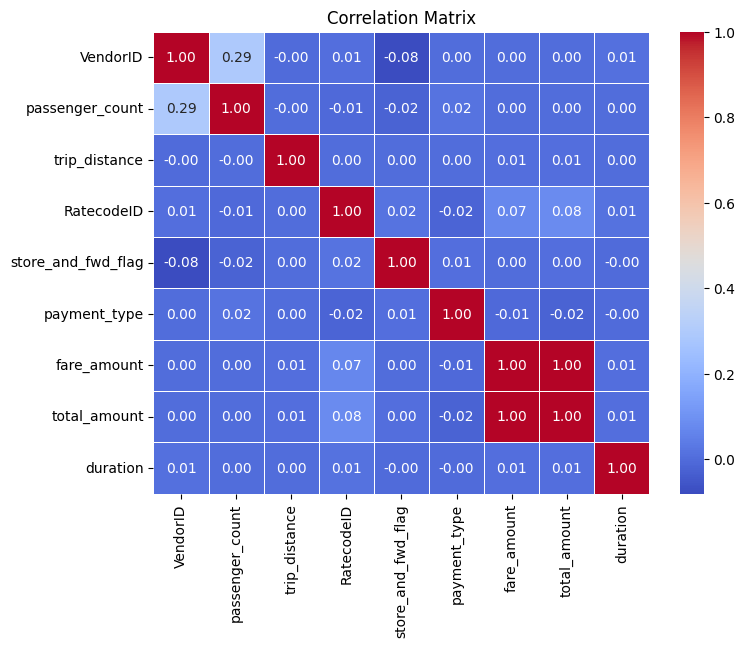

In [44]:
corr_matrix = df_main[['VendorID','passenger_count','trip_distance','RatecodeID','store_and_fwd_flag','payment_type','fare_amount','total_amount','duration']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [45]:
df_main = df_main[['passenger_count','trip_distance','payment_type','pickup_latitude','pickup_longitude','total_amount','duration']]
df_main.shape

(34328071, 7)

In [46]:
df_main.duplicated().value_counts()

False    34224510
True       103561
Name: count, dtype: int64

In [47]:
df_main.drop_duplicates(keep='first', inplace=True)
df_main.shape

(34224510, 7)

In [48]:
df_main.describe()

,passenger_count,trip_distance,payment_type,pickup_latitude,pickup_longitude,total_amount,duration
count,34224510.00000,34224510.00000,34224510.00000,34224510.00000,34224510.00000,34224510.00000,34224510.00000
mean,1.66526,5.08240,1.32988,40.25048,-73.06528,15.78538,15.54709
std,1.31931,4592.67823,0.47017,4.48879,8.14848,85.93051,203.00339
min,1.00000,-3390583.80000,1.00000,-77.03949,-161.69867,-376.30000,-537100.06667
25%,1.00000,1.00000,1.00000,40.73663,-73.99168,8.30000,6.45000
50%,1.00000,1.70000,1.00000,40.75357,-73.98159,11.76000,10.68333
75%,2.00000,3.10000,2.00000,40.76794,-73.96680,17.30000,17.20000
max,6.00000,19072628.80000,2.00000,66.85682,94.64387,429562.25000,192313.38333


In [49]:
df_main = df_main[df_main['trip_distance']>0]
#df_main = df_main[df_main['fare_amount']>0]
df_main = df_main[df_main['total_amount']>0]
df_main = df_main[df_main['duration']>0]

In [50]:
df_main.shape

(34069975, 7)

In [51]:
def remove_outliers(df,cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3-Q1
        
        lower_limit = Q1-1.5*IQR
        upper_limit = Q3+1.5*IQR
        
        df = df[(df[col]>=lower_limit)&(df[col]<=upper_limit)]
        
    return df

In [52]:
df_main = remove_outliers(df_main,['trip_distance','total_amount','duration'])
df_main.shape

(29002628, 7)

In [53]:
del df1,df2,df3,corr_matrix

In [54]:
df_main.to_csv('Dataset//2016Q1ModellingData.csv', index=False)

### Data Visualization

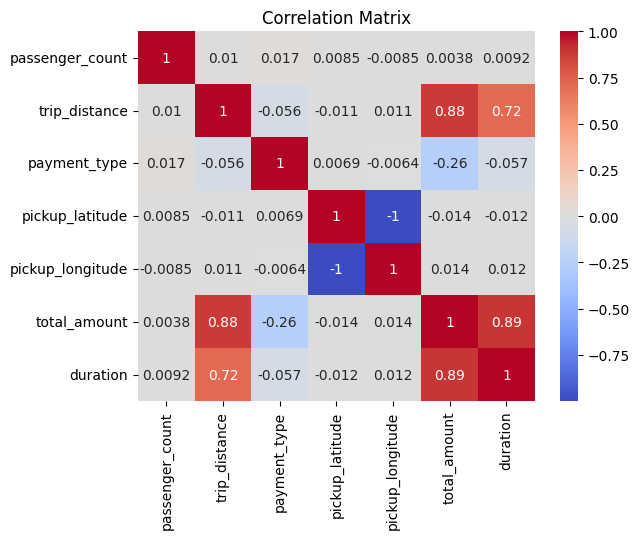

In [55]:
#!pip install seaborn --upgrade

corr_matrix = df_main.corr()

# Plot the heatmap
#plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [56]:
df_main['payment_type'] = df_main['payment_type'].replace([1,2],['Card','Cash'])

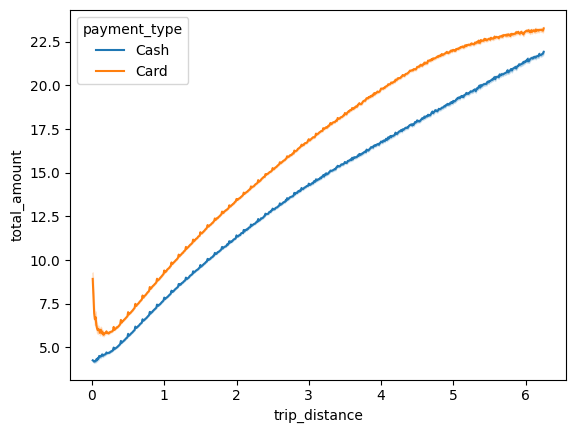

In [57]:
sns.lineplot(data=df_main, x="trip_distance", y="total_amount", hue="payment_type")
plt.show()

In [58]:
#df_main[df_main['trip_distance']>15].sort_values(by=['payment_type','total_amount'])

In [59]:
df_main[df_main['total_amount']<df_main['trip_distance']].sort_values(by=['payment_type','total_amount'])

,passenger_count,trip_distance,payment_type,pickup_latitude,pickup_longitude,total_amount,duration
907841,2,1.30000,Card,40.81006,-73.95138,0.30000,4.95000
1784664,1,0.40000,Card,40.75616,-73.96782,0.30000,0.65000
3000488,1,2.00000,Card,40.64553,-73.97462,0.30000,13.78333
3772623,1,2.30000,Card,40.66028,-73.80618,0.30000,3.66667
3963119,1,1.70000,Card,40.74149,-73.99347,0.30000,0.78333
5739545,1,5.20000,Card,40.71122,-74.01557,0.30000,0.38333
7164556,1,1.10000,Card,40.75996,-73.97895,0.30000,0.36667
12456314,1,3.70000,Card,40.71421,-74.04121,0.30000,0.03333
13945119,2,3.60000,Card,40.70935,-73.99438,0.30000,12.50000
18438466,1,0.70000,Card,40.73506,-73.99444,0.30000,0.65000


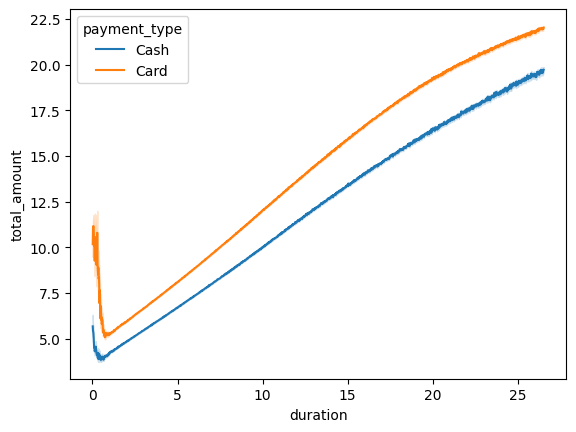

In [60]:
sns.lineplot(data=df_main, x="duration", y="total_amount", hue="payment_type")
plt.show()

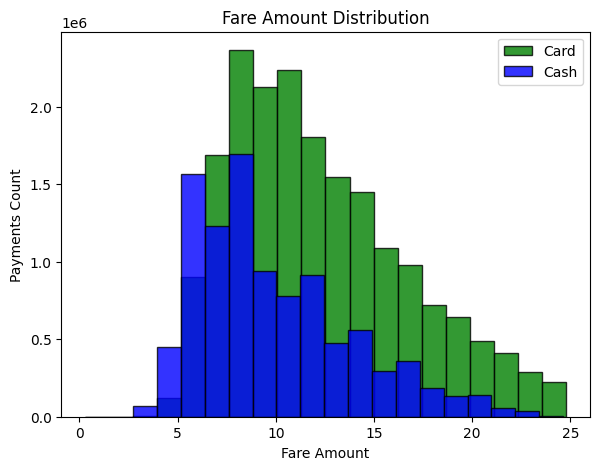

In [61]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Fare Amount Distribution')
plt.hist(df_main[df_main['payment_type']=='Card']['total_amount'], histtype='barstacked',bins=20,color='green',alpha=0.8,edgecolor='black',label='Card')
plt.hist(df_main[df_main['payment_type']=='Cash']['total_amount'], histtype='barstacked',bins=20,color='blue',alpha=0.8,edgecolor='black',label='Cash')
plt.xlabel('Fare Amount')
plt.ylabel('Payments Count')
plt.legend()
plt.show()

In [62]:
df_main.groupby('payment_type').agg({'total_amount':['mean','std'], 'trip_distance':['mean','std']}).reset_index()

payment_type total_amount         trip_distance        
                       mean     std          mean     std
0         Card     12.32003 4.42027       1.81514 1.13155
1         Cash      9.89647 3.96141       1.68039 1.18080

In [63]:
#round(df_main['payment_type'].value_counts()/df_main.shape[0]*100,2)
#df_main['payment_type'].value_counts().index

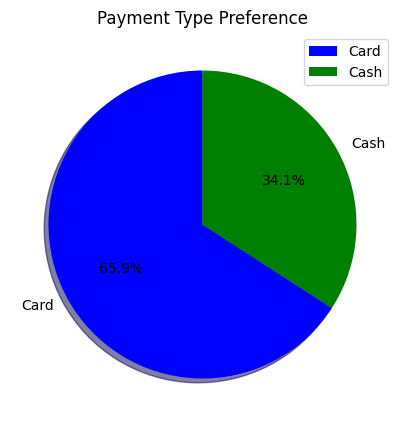

In [64]:
plt.figure(figsize=(15,5))
plt.title('Payment Type Preference')
plt.pie(round(df_main['payment_type'].value_counts()/df_main.shape[0]*100,2), labels=df_main['payment_type'].value_counts().index,
        autopct='%1.1f%%',startangle=90,shadow=True,colors=['blue','green'])
plt.legend()
plt.show()

In [65]:
bar = df_main.groupby(['payment_type','passenger_count'])[['passenger_count']].count().rename(columns={'passenger_count':'count'}).reset_index()
bar['perc'] = bar['count']/bar['count'].sum()*100
bar

,payment_type,passenger_count,count,perc
0,Card,1,13789832,47.54684
1,Card,2,2603685,8.97741
2,Card,3,725857,2.50273
3,Card,4,319471,1.10152
4,Card,5,1027310,3.54213
5,Card,6,638891,2.20287
6,Cash,1,6887895,23.74921
7,Cash,2,1469744,5.06762
8,Cash,3,437821,1.50959
9,Cash,4,230345,0.79422


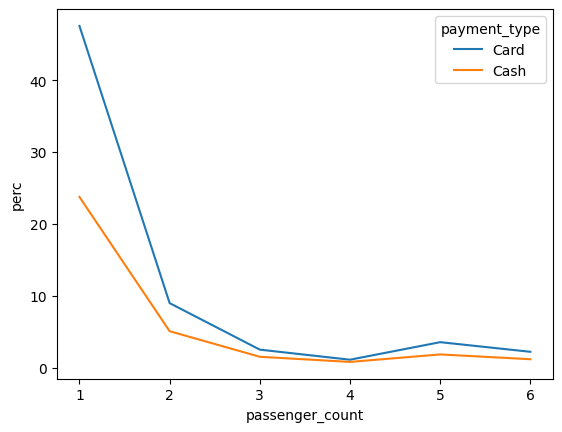

In [66]:
sns.lineplot(data=bar, x="passenger_count", y="perc", hue="payment_type")
plt.show()

In [67]:
bar=bar.pivot_table(values='perc', index = 'payment_type', columns= 'passenger_count').fillna(0).reset_index()
bar

passenger_count,payment_type,1,2,3,4,5,6
0,Card,47.54684,8.97741,2.50273,1.10152,3.54213,2.20287
1,Cash,23.74921,5.06762,1.50959,0.79422,1.83641,1.16944


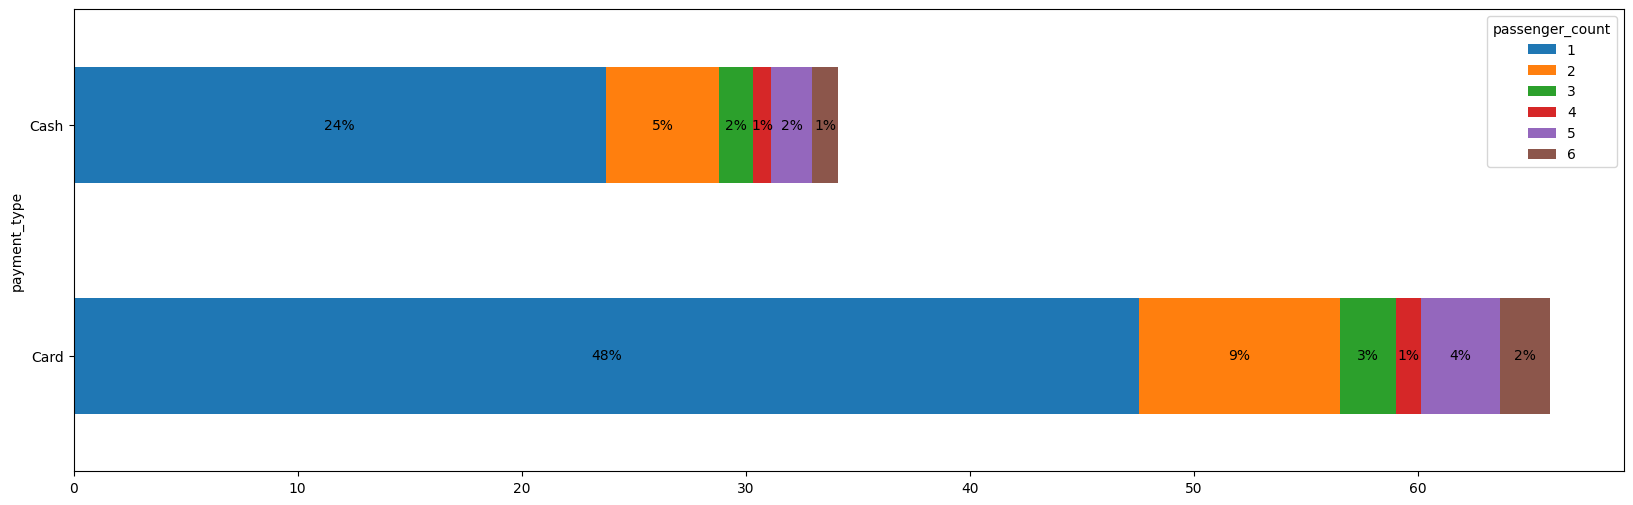

In [68]:
fig,ax = plt.subplots(figsize=(20,6))
bar.plot(x='payment_type', kind='barh',stacked=True,ax=ax)
plt.xlabel('')
for p in ax.patches:
    width=p.get_width()
    height=p.get_height()
    x,y=p.get_xy()
    ax.text(x+width/2,y+height/2,'{:.0f}%'.format(width),horizontalalignment='center',verticalalignment='center')

In [69]:
del bar,corr_matrix

### Hypothesis Testing

In [70]:
import scipy.stats as st
import statsmodels.api as sm

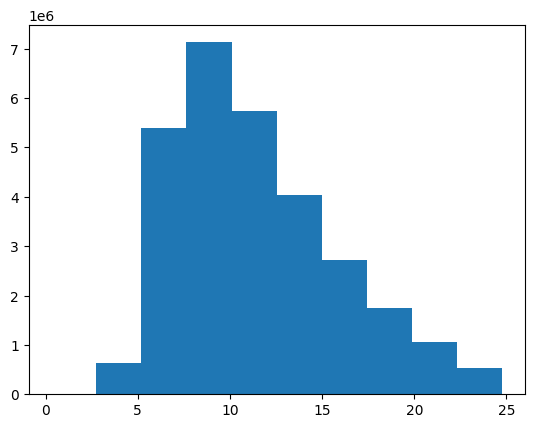

In [71]:
plt.hist(df_main['total_amount'])
plt.show()

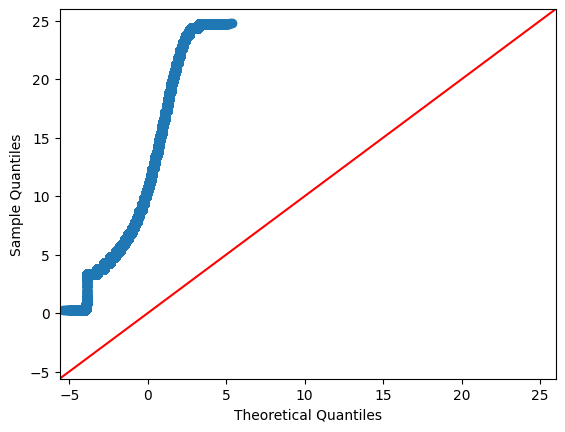

In [72]:
sm.qqplot(df_main['total_amount'],line='45')
plt.show()

In [73]:
card_sample = df_main[df_main['payment_type']=='Card']['total_amount'].sample(100000)
cash_sample = df_main[df_main['payment_type']=='Cash']['total_amount'].sample(100000)

In [69]:
t_stats, p_value = st.ttest_ind(a=card_sample, b=cash_sample, equal_var=False)
print('T-Statistc', t_stats, 'p-value', p_value)

T-Statistc 129.62882595391167 p-value 0.0


In [74]:
cash_sample

8622830     9.30000
26577600   10.30000
22049640    7.80000
13942278    8.80000
24392121    5.80000
             ...   
6914954    21.80000
32443884    6.80000
870413     14.30000
21699105    4.80000
20734930    6.80000
Name: total_amount, Length: 100000, dtype: float64

In [75]:
del df_main,card_sample,cash_sample

### Regression Model

In [92]:
#!pip install catboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
#from catboost import CatBoostRegressor

In [93]:
df_model=pd.read_csv('Dataset//2016Q1ModellingData.csv')
df_model.shape

(29002628, 7)

In [94]:
df_model.reset_index(drop=True, inplace=True)
df_model.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29002628 entries, 0 to 29002627
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   passenger_count   int64  
 1   trip_distance     float64
 2   payment_type      int64  
 3   pickup_latitude   float64
 4   pickup_longitude  float64
 5   total_amount      float64
 6   duration          float64
dtypes: float64(5), int64(2)
memory usage: 1.5 GB


In [95]:
#df_model['payment_type'] = df_model['payment_type'].replace(['Card','Cash'],[1,2])

In [96]:
X = df_model[['passenger_count','trip_distance','payment_type','pickup_latitude','pickup_longitude','duration']]
y = df_model[['total_amount']]

print(X.shape,y.shape)

(29002628, 6) (29002628, 1)


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21751971, 6) (7250657, 6) (21751971, 1) (7250657, 1)


In [98]:
# models = {
#     "Linear Regression": LinearRegression(),
#     "Ridge Regression": Ridge(alpha=1.0),
#     "Lasso Regression": Lasso(alpha=0.1),
#     "Decision Tree": DecisionTreeRegressor(random_state=42),
#     "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
#     "Support Vector Regressor": SVR(kernel='linear'),
#     "Cat Boost": CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, verbose=0)
# }

In [99]:
# results = []
# for name, model in models.items():
#     # Train the model
#     model.fit(X_train, y_train)
    
#     # Predict on test data
#     y_pred = model.predict(X_test)
    
#     # Evaluate the model
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
    
#     # Store results
#     results.append({
#         "Model": name,
#         "MSE": mse,
#         "R²": r2
#     })

# # Convert results to a DataFrame
# results_df = pd.DataFrame(results)
# results_df

In [100]:
# plt.figure(figsize=(5, 2.5))
# plt.barh(results_df['Model'], results_df['MSE'], color='skyblue')
# plt.xlabel('MSE Score')
# plt.title('Comparison of Regression Models')
# plt.show()

In [102]:
# model = CatBoostRegressor(iterations=50, learning_rate=0.1, depth=5, verbose=1)
# model.fit(X_train, y_train)
    
# y_pred = model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")

In [103]:
import lightgbm as lgb

In [104]:
model = lgb.LGBMRegressor(
    max_depth=10,
    num_leaves=31,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1
)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='rmse',
    #early_stopping_rounds=50,
    #verbose=10
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.122128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 21751971, number of used features: 6
[LightGBM] [Info] Start training from score 11.492605


LGBMRegressor(colsample_bytree=0.8, max_depth=10, n_jobs=-1, subsample=0.8)

In [105]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.6820843687199596
R-squared: 0.9651112865238938


In [106]:
y_test['preds_cat'] = y_pred
y_test

,total_amount,preds_cat
12674251,18.80000,19.08362
7498224,17.80000,21.29253
21253550,19.56000,19.05393
15385815,7.80000,7.68844
719568,7.56000,8.13670
...,...,...
26875680,5.80000,5.45106
14420958,19.30000,19.87041
14104547,9.80000,10.52934
22773987,9.95000,9.79239


In [107]:
df_output = pd.merge(X,y,how = 'left',left_index = True, right_index = True)

pred = model.predict(X)
y['predicted'] = pred

df_output = pd.merge(df_output,y[['predicted']],how = 'left',left_index = True, right_index = True)

df_output['diff'] = abs(df_output['total_amount']-df_output['predicted'])

In [108]:
df_output['diff'][(df_output['diff'].where(df_output['diff']<1).notnull())].shape[0]/df_output.shape[0]*100

84.5935375235651

In [109]:
df_output[df_output['diff'].where(df_output['diff']<1).notnull()]

,passenger_count,trip_distance,payment_type,pickup_latitude,pickup_longitude,duration,total_amount,predicted,diff
0,2,5.52000,2,40.74305,-73.98012,18.50000,20.30000,20.23819,0.06181
1,1,1.20000,2,40.74461,-73.97942,11.90000,10.30000,9.86833,0.43167
2,1,6.00000,2,40.79105,-73.94715,11.20000,19.30000,19.21814,0.08186
3,1,3.21000,2,40.72390,-73.99834,11.10000,12.80000,12.91454,0.11454
4,1,0.79000,2,40.74492,-74.00615,6.26667,7.30000,6.96404,0.33596
...,...,...,...,...,...,...,...,...,...
29002623,5,0.93000,1,40.76137,-73.97319,4.10000,7.80000,7.53771,0.26229
29002624,1,1.50000,2,40.76017,-73.96755,5.56667,8.30000,7.87506,0.42494
29002625,1,1.50000,2,40.74890,-73.93779,7.51667,8.80000,8.59183,0.20817
29002626,1,0.20000,2,40.64470,-73.78180,1.13333,4.30000,4.16754,0.13246


In [110]:
del X,X_test,X_train,y,y_test,y_train

In [111]:
%whos DataFrame

Variable    Type         Data/Info
----------------------------------
df_model    DataFrame              passenger_count<...>9002628 rows x 7 columns]
df_output   DataFrame              passenger_count<...>9002628 rows x 9 columns]
